# CSC 300 - Practical Machine Learning
## Task 2: Stanford dogs CNN assignment

# Preparation and EDA

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np

# Set the paths to the training images
directory = "./images"

# Define the parameters of the model
input_shape = (150, 150, 3)  # Input image dimensions
num_classes = 10  # Number of dog breeds

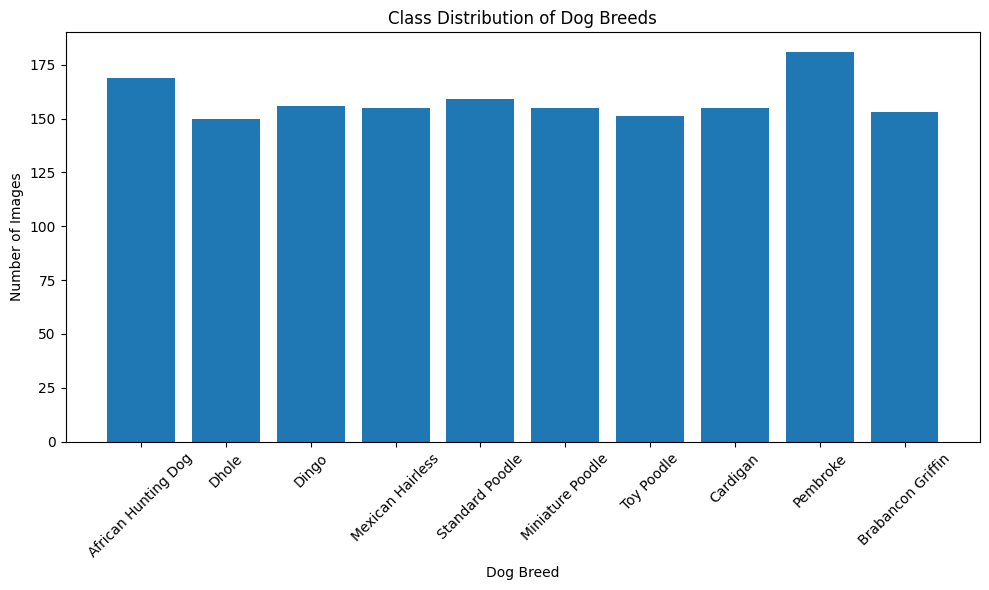

In [5]:
# List the directories for each dog breed
breed_dirs = [
    directory + "/n02116738-African_hunting_dog",
    directory + "/n02115913-dhole",
    directory + "/n02115641-dingo",
    directory + "/n02113978-Mexican_hairless",
    directory + "/n02113799-standard_poodle",
    directory + "/n02113712-miniature_poodle",
    directory + "/n02113624-toy_poodle",
    directory + "/n02113186-Cardigan",
    directory + "/n02113023-Pembroke",
    directory + "/n02112706-Brabancon_griffon"
]

# Function to compute class distribution
def compute_class_distribution(breed_dirs):
    class_counts = {}

    for breed_dir in breed_dirs:
        breed_name = os.path.basename(breed_dir)
        num_images = len(os.listdir(breed_dir))
        class_counts[breed_name] = num_images

    return class_counts

# Compute class distribution
class_counts = compute_class_distribution(breed_dirs)

# Plot the class distribution
breed_names = ["African Hunting Dog", "Dhole", "Dingo", "Mexican Hairless", "Standard Poodle", 
               "Miniature Poodle", "Toy Poodle", "Cardigan", "Pembroke", "Brabancon Griffin"]
image_counts = list(class_counts.values())

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(breed_names, image_counts)
plt.xlabel("Dog Breed")
plt.ylabel("Number of Images")
plt.title("Class Distribution of Dog Breeds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

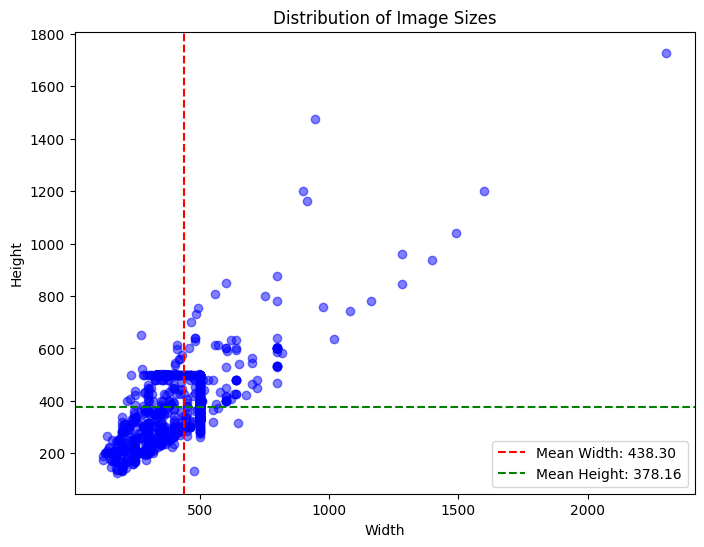

In [6]:
image_sizes = []

# Iterate over the images in the dataset directory
for root, _, files in os.walk(directory):
    for file in files:
        # Load the image and retrieve its size
        image_path = os.path.join(root, file)
        image = plt.imread(image_path)
        height, width, _ = image.shape

        # Add the image size to the list
        image_sizes.append((height, width))

# Separate the heights and widths
heights, widths = zip(*image_sizes)

# Create a scatter plot of image sizes
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5, color='blue')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Sizes')

# Calculate the mean image size
mean_width = np.mean(widths)
mean_height = np.mean(heights)

# Display the mean image size
plt.axvline(x=mean_width, color='red', linestyle='--', label=f'Mean Width: {mean_width:.2f}')
plt.axhline(y=mean_height, color='green', linestyle='--', label=f'Mean Height: {mean_height:.2f}')
plt.legend()

plt.show()

In [ ]:
# Function to load and plot sample images to get a visual idea of the dataset and the variation
def plot_sample_images(directory, breed_dirs, num_samples=5):
    fig, axes = plt.subplots(len(breed_dirs), num_samples, figsize=(50, 50))
    fig.tight_layout()

    for i, breed_dir in enumerate(breed_dirs):
        breed_name = os.path.basename(breed_dir)
        image_files = os.listdir(breed_dir)
        sample_files = np.random.choice(image_files, num_samples, replace=False)

        for j, sample_file in enumerate(sample_files):
            image_path = os.path.join(breed_dir, sample_file)
            image = plt.imread(image_path)

            axes[i][j].imshow(image)
            axes[i][j].axis("off")

    plt.show()

# Plot 5 sample images from each breed on each line
plot_sample_images(directory, breed_dirs)

# Data Preprocessing

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the training data
train_generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Load and prepare the validation data
validation_generator = datagen.flow_from_directory(
    directory,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Set up learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

Found 1270 images belonging to 10 classes.
Found 314 images belonging to 10 classes.


# Visualise the Preprocessing

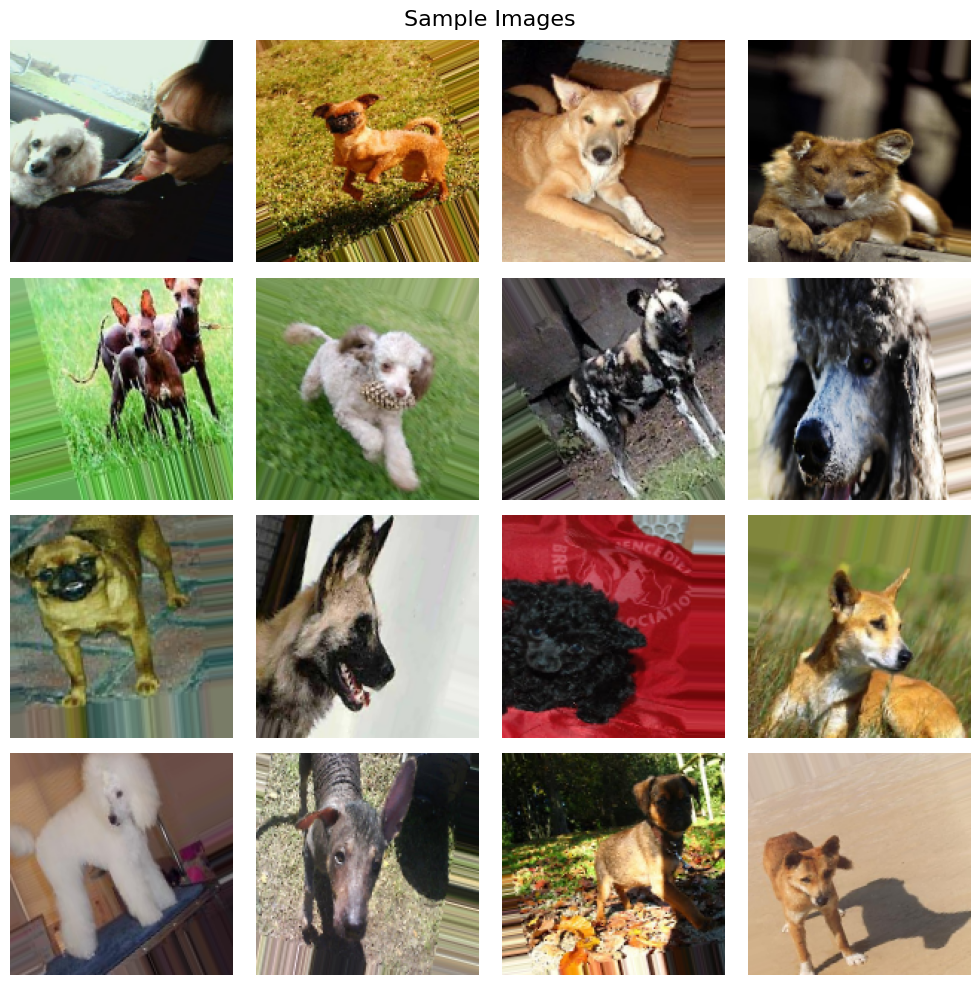

In [8]:
# Get a batch of images and labels from the train_generator
batch_images, batch_labels = next(train_generator)

# Visualize the images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("Sample Images", fontsize=16)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(batch_images[i].astype(np.uint8))
    ax.axis("off")

plt.tight_layout()
plt.show()

# 3. Modelling

Tips:
- import a base model. I would recomend starting with VGG16
- It is a multiclassification model, so you will need softmax somewhere.
- Use an optimizer. Experiment different Learning Rates.
- batch_size will define how small/big your batch will be. If you run out of memory, try to reduce the batch size.
- epochs. Experiement with epoch=1 at first, to see if you can fit the data once. After you get the model working, try larger epochs. It is up to you how many epochs you will want to do. A rule of thumb, 10-30 should be ok.

# Basic Sequential Model

Epoch 1/5
79/79 [==============================] - 28s 339ms/step - loss: 6.2181 - accuracy: 0.0973 - val_loss: 2.3012 - val_accuracy: 0.1250
Epoch 2/5
79/79 [==============================] - 17s 215ms/step - loss: 2.3020 - accuracy: 0.1140 - val_loss: 2.2956 - val_accuracy: 0.1217
Epoch 3/5
79/79 [==============================] - 17s 217ms/step - loss: 2.3121 - accuracy: 0.1140 - val_loss: 2.3007 - val_accuracy: 0.1118
Epoch 4/5
79/79 [==============================] - 17s 209ms/step - loss: 2.3009 - accuracy: 0.1164 - val_loss: 2.2981 - val_accuracy: 0.1151
Epoch 5/5
79/79 [==============================] - 16s 208ms/step - loss: 2.3001 - accuracy: 0.1124 - val_loss: 2.2978 - val_accuracy: 0.1184


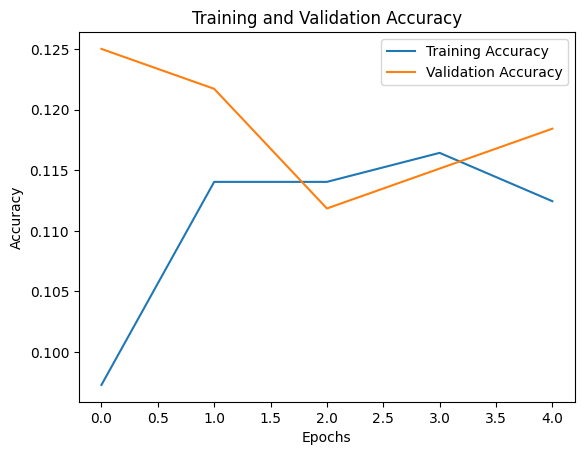

In [6]:
# Create the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Add dropout regularization
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Access the training and validation metrics
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Plot the training accuracy and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# VGG16

Epoch 1/5
79/79 [==============================] - 60s 747ms/step - loss: 8.4343 - accuracy: 0.3054 - val_loss: 2.3440 - val_accuracy: 0.5164 - lr: 0.0010
Epoch 2/5
79/79 [==============================] - 62s 791ms/step - loss: 2.7950 - accuracy: 0.4657 - val_loss: 1.7098 - val_accuracy: 0.5296 - lr: 0.0010
Epoch 3/5
79/79 [==============================] - 67s 845ms/step - loss: 1.6891 - accuracy: 0.5239 - val_loss: 1.3613 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 4/5
79/79 [==============================] - 70s 885ms/step - loss: 1.4842 - accuracy: 0.5183 - val_loss: 1.2795 - val_accuracy: 0.6086 - lr: 0.0010
Epoch 5/5
79/79 [==============================] - 70s 887ms/step - loss: 1.2762 - accuracy: 0.5837 - val_loss: 1.2121 - val_accuracy: 0.5757 - lr: 0.0010


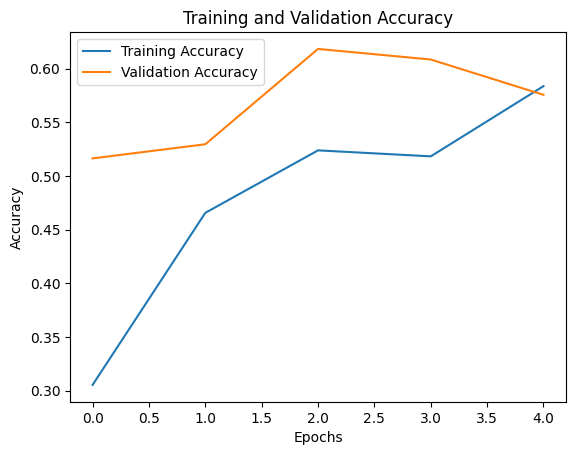

In [7]:
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model (excluding the top classifier)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model's layers
base_model.trainable = False

# Create the CNN model
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[reduce_lr]
)

# Access the training and validation metrics
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Plot the training accuracy and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ResNet50

Epoch 1/5
79/79 [==============================] - 37s 432ms/step - loss: 2.2247 - accuracy: 0.3836 - val_loss: 1.1296 - val_accuracy: 0.5855 - lr: 0.0010
Epoch 2/5
79/79 [==============================] - 32s 403ms/step - loss: 1.2600 - accuracy: 0.5335 - val_loss: 1.0712 - val_accuracy: 0.5954 - lr: 0.0010
Epoch 3/5
79/79 [==============================] - 30s 385ms/step - loss: 1.1305 - accuracy: 0.5750 - val_loss: 1.0897 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 4/5
79/79 [==============================] - 30s 381ms/step - loss: 1.0738 - accuracy: 0.5981 - val_loss: 0.9742 - val_accuracy: 0.6151 - lr: 0.0010
Epoch 5/5
79/79 [==============================] - 30s 379ms/step - loss: 0.9612 - accuracy: 0.6396 - val_loss: 1.0518 - val_accuracy: 0.6513 - lr: 0.0010


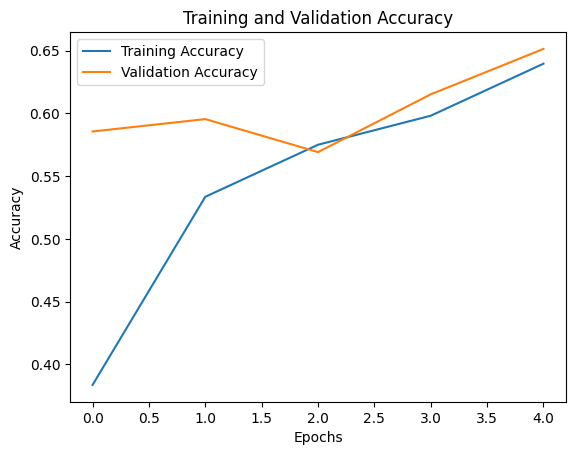

In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the pre-trained ResNet50 model (excluding the top classifier)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model's layers
base_model.trainable = False

# Create the CNN model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[reduce_lr]
)

# Access the training and validation metrics
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Plot the training accuracy and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# EfficientNet

Epoch 1/5
79/79 [==============================] - 22s 218ms/step - loss: 1.3549 - accuracy: 0.5893 - val_loss: 0.6664 - val_accuracy: 0.7599
Epoch 2/5
79/79 [==============================] - 16s 208ms/step - loss: 0.9161 - accuracy: 0.7002 - val_loss: 0.6160 - val_accuracy: 0.7664
Epoch 3/5
79/79 [==============================] - 17s 210ms/step - loss: 0.7604 - accuracy: 0.7560 - val_loss: 0.6475 - val_accuracy: 0.7697
Epoch 4/5
79/79 [==============================] - 16s 208ms/step - loss: 0.7472 - accuracy: 0.7608 - val_loss: 0.6730 - val_accuracy: 0.7829
Epoch 5/5
79/79 [==============================] - 17s 210ms/step - loss: 0.6743 - accuracy: 0.7679 - val_loss: 0.6081 - val_accuracy: 0.7928


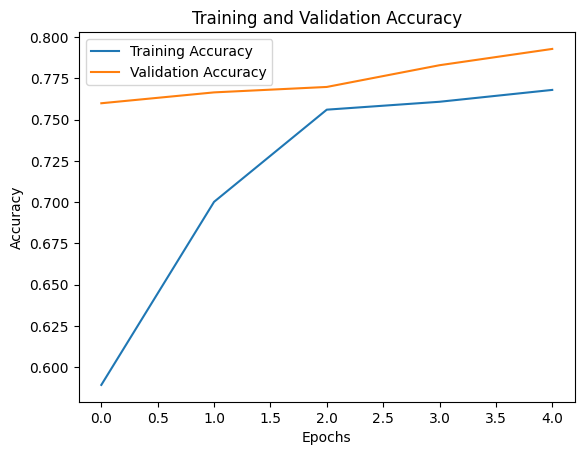

In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)  # Add Batch Normalization
x = Dropout(0.5)(x)  # Add Dropout regularization
x = Dense(512, activation='relu')(x)  # Additional dense layer
x = BatchNormalization()(x)  # Add Batch Normalization
x = Dropout(0.5)(x)  # Add Dropout regularization
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
)

# Access the training and validation metrics
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Plot the training accuracy and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Remodelling using a Bayesian Optimisation Search

In [19]:
import optuna
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def objective(trial):
    # Define the range of values for the variables and hyperparameters
    image_size = trial.suggest_categorical("image_size", [256, 512])
    batch_size = trial.suggest_categorical("batch_size", [16, 32])
    validation_split = trial.suggest_float("validation_split", 0.1, 0.3)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    activation = trial.suggest_categorical("activation", ["relu", "sigmoid", "tanh"])

    # Data preprocessing and augmentation
    datagen = ImageDataGenerator(
        validation_split=validation_split,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Load and prepare the training data
    train_generator = datagen.flow_from_directory(
        directory,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    # Load and prepare the validation data
    validation_generator = datagen.flow_from_directory(
        directory,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    # Load the pre-trained EfficientNetB0 model
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

    # Freeze the base model's layers
    base_model.trainable = False

    # Add custom classification layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation=activation)(x)
    x = BatchNormalization()(x)  # Add Batch Normalization
    x = Dropout(0.5)(x)  # Add Dropout regularization
    
    # Add additional layers
    for _ in range(num_layers):
        x = Dense(512, activation=activation)(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)

    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = keras.Model(inputs=base_model.input, outputs=predictions)

    # Compile the model with the specified learning rate
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        verbose=1
    )

    # Return the validation accuracy as the objective value
    return history.history['val_accuracy'][-1]

# Perform Bayesian optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2023-06-16 15:00:54,060] A new study created in memory with name: no-name-6d51d7e3-9410-499f-8311-083af755a832


Found 1254 images belonging to 10 classes.
Found 330 images belonging to 10 classes.
Epoch 1/10
78/78 [==============================] - 52s 608ms/step - loss: 1.3470 - accuracy: 0.6688 - val_loss: 0.6084 - val_accuracy: 0.8031
Epoch 2/10
78/78 [==============================] - 45s 575ms/step - loss: 1.0559 - accuracy: 0.7512 - val_loss: 0.6160 - val_accuracy: 0.7969
Epoch 3/10
78/78 [==============================] - 45s 576ms/step - loss: 0.9341 - accuracy: 0.7649 - val_loss: 1.0010 - val_accuracy: 0.7531
Epoch 4/10
78/78 [==============================] - 44s 567ms/step - loss: 0.8591 - accuracy: 0.7658 - val_loss: 0.7783 - val_accuracy: 0.7969
Epoch 5/10
78/78 [==============================] - 45s 574ms/step - loss: 0.8662 - accuracy: 0.7536 - val_loss: 0.7145 - val_accuracy: 0.7812
Epoch 6/10
78/78 [==============================] - 44s 565ms/step - loss: 0.8472 - accuracy: 0.7528 - val_loss: 0.6342 - val_accuracy: 0.8125
Epoch 7/10
78/78 [==============================] - 45s 5

[I 2023-06-16 15:08:29,997] Trial 0 finished with value: 0.793749988079071 and parameters: {'image_size': 256, 'batch_size': 16, 'validation_split': 0.21286700836078665, 'num_layers': 1, 'learning_rate': 0.007692791419020301, 'activation': 'tanh'}. Best is trial 0 with value: 0.793749988079071.


Found 1194 images belonging to 10 classes.
Found 390 images belonging to 10 classes.
Epoch 1/10
74/74 [==============================] - 52s 631ms/step - loss: 3.3290 - accuracy: 0.1290 - val_loss: 2.3598 - val_accuracy: 0.1094
Epoch 2/10
74/74 [==============================] - 45s 604ms/step - loss: 2.5431 - accuracy: 0.2581 - val_loss: 2.1633 - val_accuracy: 0.1953
Epoch 3/10
74/74 [==============================] - 45s 604ms/step - loss: 1.9354 - accuracy: 0.3947 - val_loss: 1.8316 - val_accuracy: 0.6016
Epoch 4/10
74/74 [==============================] - 44s 601ms/step - loss: 1.5644 - accuracy: 0.5051 - val_loss: 1.3870 - val_accuracy: 0.7083
Epoch 5/10
74/74 [==============================] - 44s 601ms/step - loss: 1.4120 - accuracy: 0.5407 - val_loss: 0.9717 - val_accuracy: 0.7344
Epoch 6/10
74/74 [==============================] - 47s 638ms/step - loss: 1.2517 - accuracy: 0.5739 - val_loss: 0.7106 - val_accuracy: 0.7839
Epoch 7/10
74/74 [==============================] - 51s 6

[I 2023-06-16 15:16:32,822] Trial 1 finished with value: 0.8359375 and parameters: {'image_size': 256, 'batch_size': 16, 'validation_split': 0.24910080758812012, 'num_layers': 1, 'learning_rate': 1.2343934226690003e-05, 'activation': 'sigmoid'}. Best is trial 1 with value: 0.8359375.


Found 1216 images belonging to 10 classes.
Found 368 images belonging to 10 classes.
Epoch 1/10
76/76 [==============================] - 177s 2s/step - loss: 1.4735 - accuracy: 0.6464 - val_loss: 1.4443 - val_accuracy: 0.7337
Epoch 2/10
76/76 [==============================] - 168s 2s/step - loss: 1.2815 - accuracy: 0.6974 - val_loss: 1.0300 - val_accuracy: 0.7636
Epoch 3/10
76/76 [==============================] - 168s 2s/step - loss: 1.1090 - accuracy: 0.7188 - val_loss: 1.0345 - val_accuracy: 0.7690
Epoch 4/10
76/76 [==============================] - 168s 2s/step - loss: 0.9330 - accuracy: 0.7558 - val_loss: 0.9797 - val_accuracy: 0.7527
Epoch 5/10
76/76 [==============================] - 168s 2s/step - loss: 0.8223 - accuracy: 0.7607 - val_loss: 0.6655 - val_accuracy: 0.7717
Epoch 6/10
76/76 [==============================] - 166s 2s/step - loss: 0.7472 - accuracy: 0.7755 - val_loss: 0.5447 - val_accuracy: 0.8125
Epoch 7/10
76/76 [==============================] - 165s 2s/step - lo

[I 2023-06-16 15:44:33,791] Trial 2 finished with value: 0.8505434989929199 and parameters: {'image_size': 512, 'batch_size': 16, 'validation_split': 0.23546755912263576, 'num_layers': 1, 'learning_rate': 0.008242707079262007, 'activation': 'relu'}. Best is trial 2 with value: 0.8505434989929199.


Found 1236 images belonging to 10 classes.
Found 348 images belonging to 10 classes.
Epoch 1/10
38/38 [==============================] - 164s 4s/step - loss: 1.1408 - accuracy: 0.6437 - val_loss: 0.4208 - val_accuracy: 0.8687
Epoch 2/10
38/38 [==============================] - 157s 4s/step - loss: 0.6547 - accuracy: 0.7741 - val_loss: 0.3866 - val_accuracy: 0.8562
Epoch 3/10
38/38 [==============================] - 164s 4s/step - loss: 0.6514 - accuracy: 0.7774 - val_loss: 0.4253 - val_accuracy: 0.8531
Epoch 4/10
38/38 [==============================] - 157s 4s/step - loss: 0.5428 - accuracy: 0.8123 - val_loss: 0.4284 - val_accuracy: 0.8406
Epoch 5/10
38/38 [==============================] - 160s 4s/step - loss: 0.4652 - accuracy: 0.8306 - val_loss: 0.4400 - val_accuracy: 0.8625
Epoch 6/10
38/38 [==============================] - 159s 4s/step - loss: 0.4573 - accuracy: 0.8547 - val_loss: 0.3571 - val_accuracy: 0.8875
Epoch 7/10
38/38 [==============================] - 158s 4s/step - lo

[I 2023-06-16 16:11:09,667] Trial 3 finished with value: 0.871874988079071 and parameters: {'image_size': 512, 'batch_size': 32, 'validation_split': 0.22252627113160336, 'num_layers': 1, 'learning_rate': 0.0007659011661753725, 'activation': 'tanh'}. Best is trial 3 with value: 0.871874988079071.


Found 1177 images belonging to 10 classes.
Found 407 images belonging to 10 classes.
Epoch 1/10
73/73 [==============================] - 174s 2s/step - loss: 3.0017 - accuracy: 0.2076 - val_loss: 0.9597 - val_accuracy: 0.7100
Epoch 2/10
73/73 [==============================] - 166s 2s/step - loss: 2.0740 - accuracy: 0.3652 - val_loss: 0.5520 - val_accuracy: 0.7875
Epoch 3/10
73/73 [==============================] - 167s 2s/step - loss: 1.6027 - accuracy: 0.4901 - val_loss: 0.4670 - val_accuracy: 0.8075
Epoch 4/10
73/73 [==============================] - 167s 2s/step - loss: 1.4272 - accuracy: 0.5409 - val_loss: 0.4536 - val_accuracy: 0.8125
Epoch 5/10
73/73 [==============================] - 166s 2s/step - loss: 1.3120 - accuracy: 0.5564 - val_loss: 0.4453 - val_accuracy: 0.8300
Epoch 6/10
73/73 [==============================] - 167s 2s/step - loss: 1.2294 - accuracy: 0.5952 - val_loss: 0.4424 - val_accuracy: 0.8200
Epoch 7/10
73/73 [==============================] - 166s 2s/step - lo

[I 2023-06-16 16:39:01,276] Trial 4 finished with value: 0.8725000023841858 and parameters: {'image_size': 512, 'batch_size': 16, 'validation_split': 0.25996094855100116, 'num_layers': 3, 'learning_rate': 7.9878161807337e-05, 'activation': 'tanh'}. Best is trial 4 with value: 0.8725000023841858.


Found 1424 images belonging to 10 classes.
Found 160 images belonging to 10 classes.
Epoch 1/10
89/89 [==============================] - 54s 532ms/step - loss: 1.2827 - accuracy: 0.6067 - val_loss: 0.5456 - val_accuracy: 0.7375
Epoch 2/10
89/89 [==============================] - 46s 518ms/step - loss: 0.8522 - accuracy: 0.7310 - val_loss: 0.5378 - val_accuracy: 0.8000
Epoch 3/10
89/89 [==============================] - 46s 521ms/step - loss: 0.7674 - accuracy: 0.7549 - val_loss: 0.6399 - val_accuracy: 0.8062
Epoch 4/10
89/89 [==============================] - 46s 520ms/step - loss: 0.6788 - accuracy: 0.7654 - val_loss: 0.4972 - val_accuracy: 0.8313
Epoch 5/10
89/89 [==============================] - 46s 520ms/step - loss: 0.7066 - accuracy: 0.7662 - val_loss: 0.5406 - val_accuracy: 0.8125
Epoch 6/10
89/89 [==============================] - 46s 519ms/step - loss: 0.5633 - accuracy: 0.7900 - val_loss: 0.4891 - val_accuracy: 0.8125
Epoch 7/10
89/89 [==============================] - 46s 5

[I 2023-06-16 16:46:53,842] Trial 5 finished with value: 0.893750011920929 and parameters: {'image_size': 256, 'batch_size': 16, 'validation_split': 0.10421175082496446, 'num_layers': 3, 'learning_rate': 0.0012310052150316707, 'activation': 'tanh'}. Best is trial 5 with value: 0.893750011920929.


Found 1412 images belonging to 10 classes.
Found 172 images belonging to 10 classes.
Epoch 1/10
44/44 [==============================] - 169s 4s/step - loss: 1.7811 - accuracy: 0.4688 - val_loss: 0.7339 - val_accuracy: 0.7563
Epoch 2/10
44/44 [==============================] - 161s 4s/step - loss: 1.1175 - accuracy: 0.6674 - val_loss: 0.6236 - val_accuracy: 0.7375
Epoch 3/10
44/44 [==============================] - 161s 4s/step - loss: 0.9194 - accuracy: 0.7029 - val_loss: 0.5524 - val_accuracy: 0.7750
Epoch 4/10
44/44 [==============================] - 167s 4s/step - loss: 0.8073 - accuracy: 0.7130 - val_loss: 0.4282 - val_accuracy: 0.8188
Epoch 5/10
44/44 [==============================] - 162s 4s/step - loss: 0.7735 - accuracy: 0.7399 - val_loss: 0.5861 - val_accuracy: 0.8188
Epoch 6/10
44/44 [==============================] - 167s 4s/step - loss: 0.7563 - accuracy: 0.7333 - val_loss: 0.4499 - val_accuracy: 0.8438
Epoch 7/10
44/44 [==============================] - 176s 4s/step - lo

[I 2023-06-16 17:14:43,145] Trial 6 finished with value: 0.7875000238418579 and parameters: {'image_size': 512, 'batch_size': 32, 'validation_split': 0.11199804571525095, 'num_layers': 3, 'learning_rate': 0.001482657797552012, 'activation': 'relu'}. Best is trial 5 with value: 0.893750011920929.


Found 1403 images belonging to 10 classes.
Found 181 images belonging to 10 classes.
Epoch 1/10
43/43 [==============================] - 175s 4s/step - loss: 1.4725 - accuracy: 0.6047 - val_loss: 0.6551 - val_accuracy: 0.7625
Epoch 2/10
43/43 [==============================] - 165s 4s/step - loss: 0.9567 - accuracy: 0.6973 - val_loss: 0.7241 - val_accuracy: 0.7688
Epoch 3/10
43/43 [==============================] - 164s 4s/step - loss: 0.9101 - accuracy: 0.7133 - val_loss: 0.6643 - val_accuracy: 0.7375
Epoch 4/10
43/43 [==============================] - 164s 4s/step - loss: 0.8370 - accuracy: 0.7498 - val_loss: 0.8071 - val_accuracy: 0.7563
Epoch 5/10
43/43 [==============================] - 165s 4s/step - loss: 0.9122 - accuracy: 0.7243 - val_loss: 0.7032 - val_accuracy: 0.7750
Epoch 6/10
43/43 [==============================] - 166s 4s/step - loss: 0.8810 - accuracy: 0.7214 - val_loss: 0.5686 - val_accuracy: 0.7750
Epoch 7/10
43/43 [==============================] - 166s 4s/step - lo

[I 2023-06-16 17:42:27,616] Trial 7 finished with value: 0.831250011920929 and parameters: {'image_size': 512, 'batch_size': 32, 'validation_split': 0.11635690228872671, 'num_layers': 2, 'learning_rate': 0.006006412868540499, 'activation': 'tanh'}. Best is trial 5 with value: 0.893750011920929.


Found 1137 images belonging to 10 classes.
Found 447 images belonging to 10 classes.
Epoch 1/10
35/35 [==============================] - 170s 5s/step - loss: 1.9830 - accuracy: 0.4299 - val_loss: 0.5431 - val_accuracy: 0.7812
Epoch 2/10
35/35 [==============================] - 160s 5s/step - loss: 1.1159 - accuracy: 0.6389 - val_loss: 0.4590 - val_accuracy: 0.8149
Epoch 3/10
35/35 [==============================] - 159s 5s/step - loss: 0.8772 - accuracy: 0.7086 - val_loss: 0.5469 - val_accuracy: 0.8341
Epoch 4/10
35/35 [==============================] - 159s 5s/step - loss: 0.7894 - accuracy: 0.7348 - val_loss: 0.4028 - val_accuracy: 0.8413
Epoch 5/10
35/35 [==============================] - 158s 5s/step - loss: 0.8637 - accuracy: 0.7312 - val_loss: 0.3991 - val_accuracy: 0.8630
Epoch 6/10
35/35 [==============================] - 158s 5s/step - loss: 0.7405 - accuracy: 0.7493 - val_loss: 0.3663 - val_accuracy: 0.8822
Epoch 7/10
35/35 [==============================] - 159s 5s/step - lo

[I 2023-06-16 18:09:11,062] Trial 8 finished with value: 0.8605769276618958 and parameters: {'image_size': 512, 'batch_size': 32, 'validation_split': 0.2845073234469042, 'num_layers': 3, 'learning_rate': 0.0006054027732853424, 'activation': 'tanh'}. Best is trial 5 with value: 0.893750011920929.


Found 1194 images belonging to 10 classes.
Found 390 images belonging to 10 classes.
Epoch 1/10
74/74 [==============================] - 177s 2s/step - loss: 1.6553 - accuracy: 0.6205 - val_loss: 0.6574 - val_accuracy: 0.7370
Epoch 2/10
74/74 [==============================] - 169s 2s/step - loss: 1.0624 - accuracy: 0.7216 - val_loss: 0.7764 - val_accuracy: 0.7344
Epoch 3/10
74/74 [==============================] - 169s 2s/step - loss: 0.9161 - accuracy: 0.7538 - val_loss: 0.7083 - val_accuracy: 0.7578
Epoch 4/10
74/74 [==============================] - 168s 2s/step - loss: 0.9143 - accuracy: 0.7496 - val_loss: 0.5535 - val_accuracy: 0.8203
Epoch 5/10
74/74 [==============================] - 166s 2s/step - loss: 0.8228 - accuracy: 0.7623 - val_loss: 0.5343 - val_accuracy: 0.8255
Epoch 6/10
74/74 [==============================] - 162s 2s/step - loss: 0.8259 - accuracy: 0.7649 - val_loss: 0.5219 - val_accuracy: 0.8255
Epoch 7/10
74/74 [==============================] - 166s 2s/step - lo

[I 2023-06-16 18:37:08,093] Trial 9 finished with value: 0.8046875 and parameters: {'image_size': 512, 'batch_size': 16, 'validation_split': 0.2492776099714159, 'num_layers': 1, 'learning_rate': 0.0072754413541514865, 'activation': 'sigmoid'}. Best is trial 5 with value: 0.893750011920929.


# Remodel using the best parameters

Found 1424 images belonging to 10 classes.
Found 160 images belonging to 10 classes.
Epoch 1/30
89/89 [==============================] - 54s 537ms/step - loss: 1.3108 - accuracy: 0.6236 - val_loss: 0.7955 - val_accuracy: 0.6938
Epoch 2/30
89/89 [==============================] - 48s 544ms/step - loss: 0.9529 - accuracy: 0.7107 - val_loss: 0.4646 - val_accuracy: 0.8687
Epoch 3/30
89/89 [==============================] - 43s 486ms/step - loss: 0.7658 - accuracy: 0.7626 - val_loss: 0.4650 - val_accuracy: 0.8375
Epoch 4/30
89/89 [==============================] - 43s 488ms/step - loss: 0.7691 - accuracy: 0.7430 - val_loss: 0.4790 - val_accuracy: 0.8375
Epoch 5/30
89/89 [==============================] - 43s 483ms/step - loss: 0.6126 - accuracy: 0.7999 - val_loss: 0.5611 - val_accuracy: 0.8250
Epoch 6/30
89/89 [==============================] - 43s 482ms/step - loss: 0.6293 - accuracy: 0.7921 - val_loss: 0.6392 - val_accuracy: 0.8000
Epoch 7/30
89/89 [==============================] - 43s 4

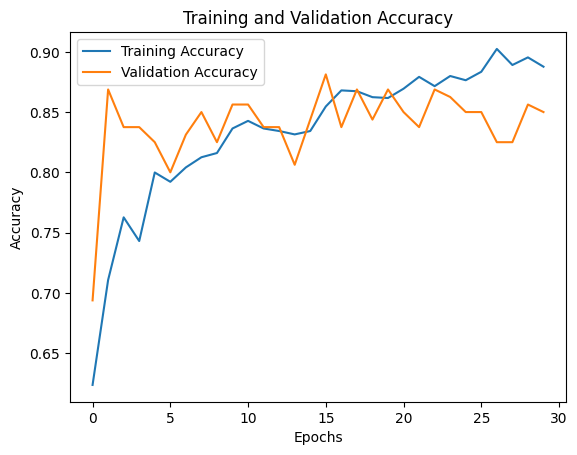

In [11]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow import keras

# Define the parameters of the model
input_shape = (256, 256, 3)  # Input image dimensions

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    validation_split=0.10421175082496446,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the training data
train_generator = datagen.flow_from_directory(
    directory,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Load and prepare the validation data
validation_generator = datagen.flow_from_directory(
    directory,
    target_size=(256,265),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model's layers
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)  # Add Batch Normalization
x = Dropout(0.5)(x)  # Add Dropout regularization

x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0012310052150316707)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose = 1
)

# Access the training and validation metrics
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Plot the training accuracy and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final Model

Found 1424 images belonging to 10 classes.
Found 160 images belonging to 10 classes.
Epoch 1/30
89/89 [==============================] - 51s 504ms/step - loss: 1.2850 - accuracy: 0.6243 - val_loss: 0.5296 - val_accuracy: 0.8125 - lr: 0.0012
Epoch 2/30
89/89 [==============================] - 43s 486ms/step - loss: 0.8321 - accuracy: 0.7268 - val_loss: 0.5767 - val_accuracy: 0.7875 - lr: 0.0012
Epoch 3/30
89/89 [==============================] - 43s 488ms/step - loss: 0.7552 - accuracy: 0.7619 - val_loss: 0.5525 - val_accuracy: 0.7875 - lr: 0.0012
Epoch 4/30
89/89 [==============================] - 44s 488ms/step - loss: 0.7544 - accuracy: 0.7640 - val_loss: 0.6962 - val_accuracy: 0.7750 - lr: 0.0012
Epoch 5/30
89/89 [==============================] - 44s 492ms/step - loss: 0.5637 - accuracy: 0.8111 - val_loss: 0.3870 - val_accuracy: 0.8438 - lr: 2.4620e-04
Epoch 6/30
89/89 [==============================] - 44s 489ms/step - loss: 0.5139 - accuracy: 0.8258 - val_loss: 0.4008 - val_accur

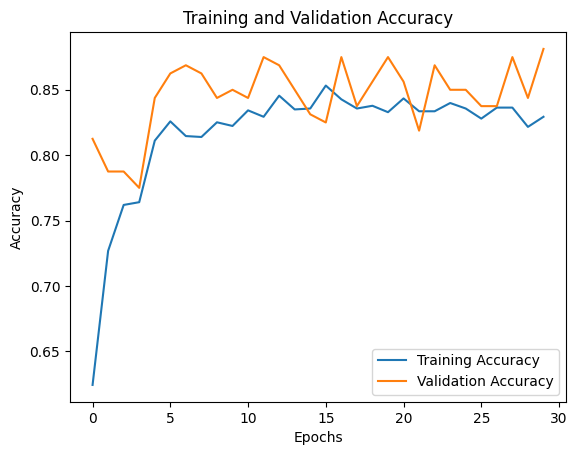

In [8]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
directory = "./images"

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Define the parameters of the model
input_shape = (256, 256, 3)  # Input image dimensions

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    validation_split=0.10421175082496446,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the training data
train_generator = datagen.flow_from_directory(
    directory,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

# Load and prepare the validation data
validation_generator = datagen.flow_from_directory(
    directory,
    target_size=(256,265),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model's layers
base_model.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0012310052150316707)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose = 1,
    callbacks=[reduce_lr]
)

# Access the training and validation metrics
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# Plot the training accuracy and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()